<a href="https://colab.research.google.com/github/ghanendrapiplani/ml_projects/blob/master/sklearn_boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# We try fitting the above linear regression model to an actual real world dataset:
# - CRIM     per capita crime rate by town
# - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# - INDUS    proportion of non-retail business acres per town
# - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# - NOX      nitric oxides concentration (parts per 10 million)
# - RM       average number of rooms per dwelling
# - AGE      proportion of owner-occupied units built prior to 1940
# - DIS      weighted distances to five Boston employment centres
# - RAD      index of accessibility to radial highways
# - TAX      full-value property-tax rate per $10,000
# - PTRATIO  pupil-teacher ratio by town
# - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# - LSTAT    % lower status of the population
# - MEDV     Median value of owner-occupied homes in $1000's <----- Target value to predict

from sklearn.datasets import load_boston
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

boston = load_boston()
b_df = pd.DataFrame(boston['data'])
b_df.columns = np.unique(boston['feature_names'])
target_df = pd.DataFrame(boston['target'])
target_df.columns=['Median']
train_b_x, test_b_x, train_b_y, test_b_y = train_test_split(b_df, target_df, test_size=0.3, random_state=101)

lm_b = LinearRegression()
lm_b.fit(train_b_x, train_b_y)
cdf_b = pd.DataFrame(lm_b.coef_[0], test_b_x.columns, columns=['Coeff'])
print(cdf_b)
print(lm_b.intercept_)


             Coeff
AGE      -0.088505
B         0.050293
CHAS      0.020348
CRIM      3.754271
DIS     -17.748371
INDUS     3.247765
LSTAT     0.012001
NOX      -1.409161
PTRATIO   0.263881
RAD      -0.010344
RM       -0.951781
TAX       0.006116
ZN       -0.597133
[40.21892901]


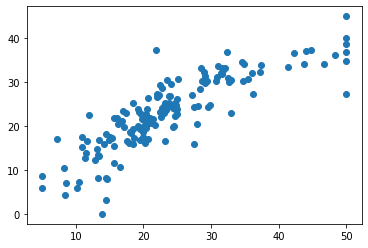

In [0]:
pred = lm_b.predict(test_b_x)
plt.scatter(test_b_y, pred)

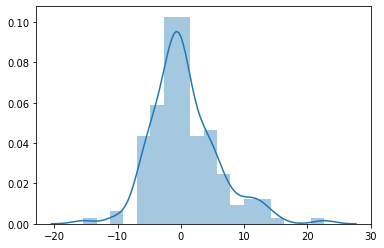

In [0]:
sns.distplot((test_b_y - pred))

In [0]:
from sklearn import metrics

print(metrics.mean_absolute_error(test_b_y, pred ))
print(metrics.mean_squared_error(test_b_y, pred ))
print(np.sqrt(metrics.mean_squared_error(test_b_y, pred )))

3.835696361418927
28.547585271468208
5.342994036256096
